# Проверка гипотез по увеличению выручки в интернет-магазине, оценка результатов A/B теста

Цель исследования: используя данные интернет-магазина приоритезировать гипотезы, произвести оценку результатов A/B-тестирования различными методами

Содержание
* Часть 1. Приоритизация гипотез
 * Описание данных
 * Фреймворк ICE для приоритизации гипотез
 * Фреймворк RICE для приоритизации гипотез
 * Выводы
* Часть 2. Анализ A/B-теста
 * Описание данных
 * График кумулятивной выручки по группам
 * График кумулятивного среднего чека по группам
 * График относительного изменения кумулятивного среднего чека группы B к группе A
 * График кумулятивного среднего количества заказов на посетителя по группам
 * График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A
 * График количества заказов по пользователям
 * 95-й и 99-й перцентили количества заказов на пользователя
 * График стоимостей заказов
 * Расчёт статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным
 * Расчёт статистической значимости различий в среднем чеке заказа между группами по «сырым» данным
 * Расчёт статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным
 * Расчёт статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным
 * Решение по результатам теста
* Выводы


## Часть 1. Приоритизация гипотез
В файле hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort. Необходимо провести приоритизацию гипотез при помощи фреймворков ICE И RICE

### Описание данных

* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

In [1]:
# подкючение библиотек
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro
# Сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', None)

In [2]:
# загрузка данных из файла
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### Фреймворк ICE для приоритизации гипотез

Формула для расчёта параметра ICE $$ICE = \frac{Impact * Confidence}{Efforts}$$

In [3]:
# добавление столбца параметра ICE(impact, confidence, effort / ease «влияние, уверенность, усилия / простота»)
data['ICE'] = data['Impact'] * data['Confidence'] / data['Efforts']
data[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Наиболее перспективными являются гипотезы:
* №8 "Запустить акцию, дающую скидку на товар в день рождения"
* №0 "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"
* №7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
* №6 "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию"
* №2 "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"


### Фреймворк RICE для приоритизации гипотез

Формула для расчёта параметра RICE $$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$



In [4]:
data['RICE'] = data['Reach'] * data['Impact'] * data['Confidence'] / data['Efforts']
data[['Hypothesis', 'RICE' ]].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Наиболее перспективными по методу RICE являются гипотезы:
* №7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
* №2 "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"
* №0 "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"
* №6 "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию"
* №8 "Запустить акцию, дающую скидку на товар в день рождения"



### <b>Выводы</b>
<p>Наиболее перспективные гипотезы по ICE и RICE (0, 2, 6, 7, 8), однако на первом месте по RICE уже гипотеза под номером 7 (её параметр Reach = 10, в то время как у других гипотез он меньше: самая перспективная гипотеза №8 по ICE имеет самый маленький охват пользователей). Кроме силы гипотез в методе ICE, необходимо учитывать и то, как много пользователей гипотезы затронут (учтено в методе RICE)


In [5]:
# гипотеза, параметры ICE и RICE для сравнения
data = data[['Hypothesis', 'ICE', 'RICE' ]].sort_values(by='RICE', ascending=False)
data

,Hypothesis,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000,3.0


Построим график, на котором отобразим два параметра для лучшей визуализации параметров ICE / RICE

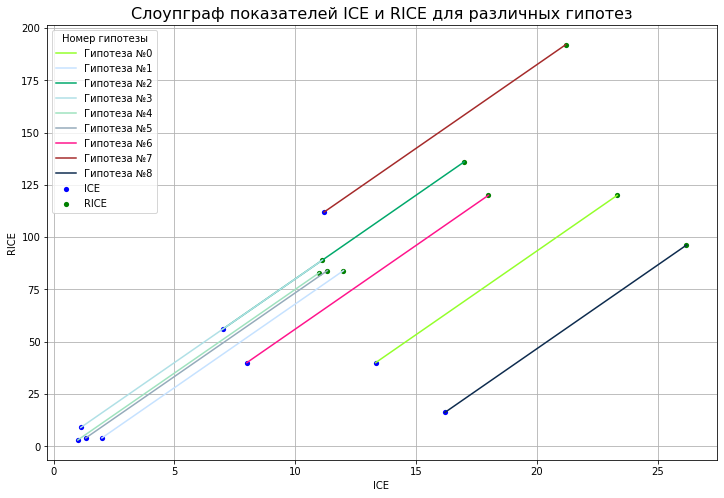

In [6]:
my_slope = 8 # invented slope value

def find_second_point(slope,x0,y0):
    # this function returns a point which belongs to the line that has the slope 
    # inserted by the user and that intercepts the point (x0,y0) inserted by the user
    q = y0 - (slope*x0)  # calculate q
    new_x = x0 + 10  # generate random x adding 10 to the intersect x coordinate
    new_y = (slope*new_x) + q  # calculate new y corresponding to random new_x created

    return new_x, new_y  # return x and y of new point that belongs to the line
color = ['#94ff2b', '#c6e2ff', '#00a86b', '#b0e0e6', '#9fe2bf', '#95abbb', '#ff148c', '#a52a2a', '#0d2b4e']
plt.figure(figsize=(12, 8))  # create new figure
l = []
# invoke function to calculate the new point
for i in range(len(data)):
    new_x, new_y = find_second_point(my_slope , data['ICE'][i], data['RICE'][i])
    plt.plot((data['ICE'][i], new_x),(data['RICE'][i], new_y), c=color[i], label=f'Гипотеза №{i}')
    l.append(f'Гипотеза №{i}')
    plt.scatter(data['ICE'][i], data['RICE'][i], c='b', s=5, linewidths=3, label='ICE')
    plt.scatter(new_x, new_y, c='g', s=5, linewidths=3, label='RICE')
l.append('ICE')
l.append('RICE')
plt.legend(l, title='Номер гипотезы')  # add legend to image

plt.ylabel('RICE')
plt.xlabel('ICE ')
plt.title('Слоупграф показателей ICE и RICE для различных гипотез', fontsize=16)
plt.grid(linewidth=0.8)

Итак, график хорошо визуализирует зависимость параметров ICE / RICE  и легко позволяет принять решение по выбору лучших гипотез (гипотезы 7, 2, почти одинаковые по RICE 6 и 0,  и гипотеза 8)

## Часть 2. Анализ A/B-теста

### Описание данных
Файл orders.csv:
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

Файл visitors.csv:
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

In [9]:
# вывод информации о датафрейме orders
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


Пропусков нет

In [10]:
# вывод первых 5 строк датафрейма orders
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [11]:
# проверка на дубликаты
orders.duplicated().value_counts()

False    1197
dtype: int64

Размер датафрейма orders 1197, дубликатов нет

In [12]:
# количество посетителей по группам
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

In [13]:
# число уникальных посетителей по группам
orders.groupby('group').agg({'visitorId': 'nunique'})

,visitorId
group,
A,503
B,586


В датафрейме orders посетители разбиты на две группы - А (557 человек) и В (640 человек), из них уникальных в группе А - 503 человека, в группе В - 586 человек

In [14]:
# вывод информации о датафрейме visitors
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Пропусков нет

In [15]:
# вывод первых 5 строк датафрейма visitors
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [16]:
# проверка на дубликаты
visitors.duplicated().value_counts()

False    62
dtype: int64

Размер датафрейма orders 62, дубликатов нет

In [17]:
# проверка количества групп и посетителей в каждой группе
visitors['group'].value_counts()

A    31
B    31
Name: group, dtype: int64

Датафрейм содержит две группы А и В, в каждой по 31 посетителю

In [18]:
# период исследования

print('Минимальная дата исследования: ', visitors['date'].min().date())
print('Максимальная дата исследования: ', visitors['date'].max().date())

Минимальная дата исследования:  2019-08-01
Максимальная дата исследования:  2019-08-31


In [19]:
# поиск пользователей, которые могли попасть в обе группы
df = orders.groupby('visitorId').agg({'group': 'nunique'}).sort_values(by='group', ascending=False)
df

,group
visitorId,
2654030115,2
3891541246,2
3941795274,2
1404934699,2
351125977,2
...,...
1476256851,1
1476741193,1
1484903144,1


In [20]:
# список пользователей, которые попали и в группу А, и в группу В
visitors_dupl_gr = df.query('group >=2 ').index.to_list()

In [21]:
# список "чистых" пользователей, которые находятся только в группе А или только в группе В
visitors_clear_gr = df.query('group == 1 ').index.to_list()

# осталвяем в датафрейме только "чистых пользователей"
clear_orders = orders.query('visitorId in @visitors_clear_gr')
clear_orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


In [22]:
# обработка посетителей, оказавшихся в группе А и в группе В одновременно
for vis in visitors_dupl_gr:

    # счетчик попадний в группы для одного пользователя
    count_A = 0
    count_B = 0 
    
    # отбираем подозрительного пользователя из общего датафрейма
    temp_qwery = orders.query('visitorId == @vis')
    
    # сколько раз попал в группу А и в группу В
    count_A = len(temp_qwery.query('group =="A"'))
    count_B = len(temp_qwery.query('group =="B"'))    
    
    # если в каждой по 1 разу - оставляем запись с минимальной датой
    if count_A == count_B == 1:
        min_date = temp_qwery['date'].min()
        # добавление "дублирующися" пользователей, по минимальной дате в чистый датафрейм
        clear_orders.append(temp_qwery.query('date == @min_date'))
    
    # если большинство поаданий в группу В при случайном одном попадании в группу А, оставляем записи с группой В
    elif count_A == 1 and count_B > 1:
        clear_orders = clear_orders.append(temp_qwery.query('group == "B"'))
    
    # если большинство поаданий в группу А при случайном одном попадании в группу В, оставляем записи с группой А
    elif count_B == 1:        
        clear_orders = clear_orders.append(temp_qwery.query('group == "A"'))
    
    # если в каждой из групп более чем по 2 заказа, таких пользователей исключим
        
clear_orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1100,1671551244,3062433592,2019-08-12,2970,B
814,1759418862,4186807279,2019-08-21,18560,B
819,380064637,4186807279,2019-08-27,13740,B
516,3754751399,2044997962,2019-08-26,6090,B


Датафрейм содержит данные о пользователях, которые попали и в группу А, и в группу В, было принято решение оставлять записи с минимальной датой распределения, итого датафрейм уменьшился на 11% 

In [23]:
# например, visitorId == 2044997962 встречался 3 раза, 2 из них в группе В, оставляем группу А - по самой ранней дате
orders.query('visitorId == 3891541246')

,transactionId,visitorId,date,revenue,group
159,1170827001,3891541246,2019-08-22,990,A
606,4007826947,3891541246,2019-08-04,480,B
609,332633624,3891541246,2019-08-04,5020,A


In [24]:
# после очистки осталась только группа А
clear_orders.query('visitorId == 3891541246')

,transactionId,visitorId,date,revenue,group
159,1170827001,3891541246,2019-08-22,990,A
609,332633624,3891541246,2019-08-04,5020,A


In [25]:
# удаление дубликатов
orders = clear_orders
orders[['visitorId', 'group']].drop_duplicates()

,visitorId,group
0,3312258926,B
1,3642806036,B
3,1196621759,B
4,2322279887,B
5,935554773,B
...,...,...
677,1294878855,A
26,199603092,A
111,3062433592,B
814,4186807279,B


In [26]:
# число уникальных  "чистых" посетителей по группам
orders.groupby('group').agg({'visitorId': 'nunique'})

,visitorId
group,
A,452
B,539


In [27]:
# cоздание датафрейм datesGroups с уникальными парами значений 'date' и 'group', таблицы orders. 
# и удаление дубликатов методом drop_duplicates()
datesGroups = orders[['date', 'group']].drop_duplicates()
datesGroups.head()

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


In [30]:
# объявление переменной cumulativeData -  объединение ordersAggregated и visitorsAggregated 
# по колонкам 'date', 'group' методом merge()
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)

# переименование столбцов
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

# вывод первых 5 строк переменной cumulativeData
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,19,18,82717,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,42,40,244760,1294
4,2019-08-03,A,66,60,346854,1845


In [31]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders', 'visitors']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders', 'visitors']]

### График кумулятивной выручки по группам

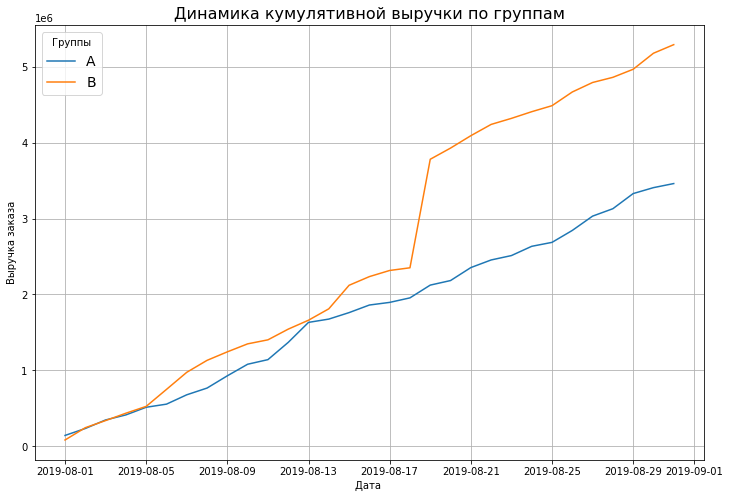

In [32]:
plt.figure(figsize=(12, 8))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend(title= 'Группы', title_fontsize = 10,  prop = {'size' : 14}) 
plt.ylabel('Выручка заказа')
plt.xlabel('Дата ')
plt.title('Динамика кумулятивной выручки по группам', fontsize=16)
plt.grid(linewidth=0.8)

Выручка группы А почти равномерно увеличивается в течение всего теста. 
Выручка группы B в середине теста резко увеличивается относительно группы А и продолжает лидировать весь остаток теста. Похоже, что на этот период пришлись аномально большие заказы.

### График кумулятивного среднего чека по группам

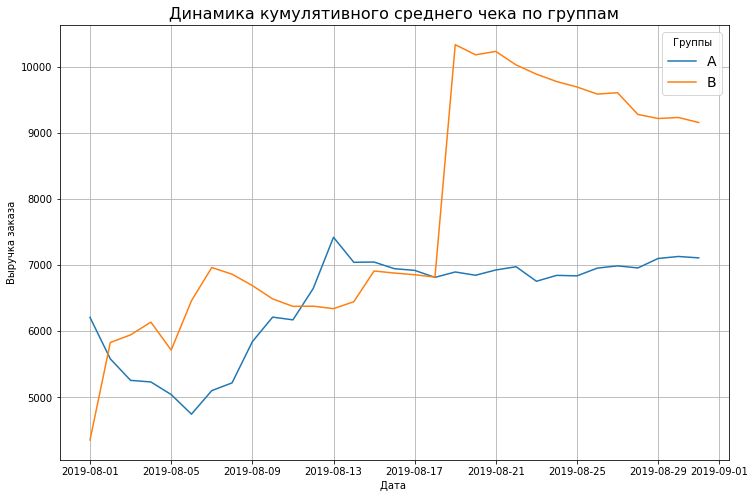

In [33]:
# Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов
plt.figure(figsize=(12, 8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend(title= 'Группы', title_fontsize = 10,  prop = {'size' : 14}) 
plt.ylabel('Выручка заказа')
plt.xlabel('Дата ')
plt.title('Динамика кумулятивного среднего чека по группам', fontsize=16)
plt.grid(linewidth=0.8)

Кумулятивное значение среднего чека для группы А выросло к 13.08.2019 и становится относительно равномерным к концу теста. 
Резкий скачок для группы В в середине теста снова дает основание для предположения, что в группу В попали крупные заказы. 
Требуется дополнительный анализ выбросов, которые могут исказить результат

### График относительного изменения кумулятивного среднего чека группы B к группе A

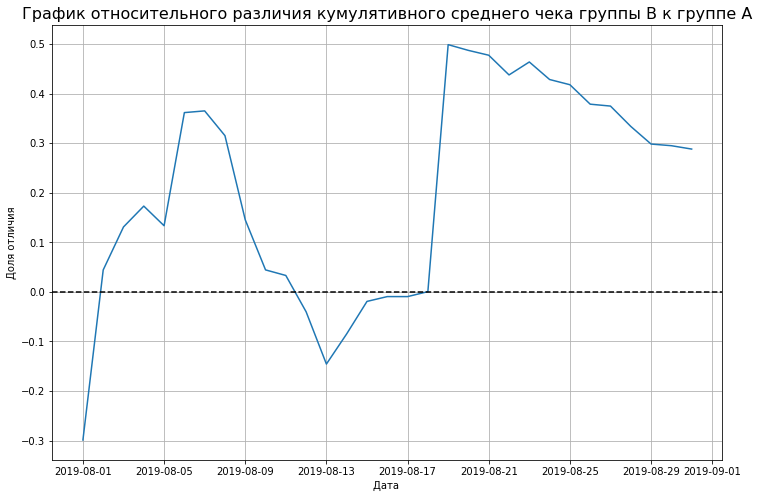

In [34]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, 
    left_on='date', 
    right_on='date', 
    how='left', 
    suffixes=['A', 'B']
)

# cтроим отношение средних чеков
plt.figure(figsize=(12, 8))
plt.plot(
    mergedCumulativeRevenue['date'], 
    (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])\
    /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1
)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.ylabel('Доля отличия')
plt.xlabel('Дата ')
plt.title('График относительного различия кумулятивного среднего чека группы B к группе A', fontsize=16)
plt.grid(linewidth=0.8)

Результаты теста резко и сильно менялись в несколько дат, видимо, тогда и были совершены аномальные заказы (например, 18.08.2019 относительное различие средних чеков достигало 50%  в группе В к группе А и снизилось только к 29% к концу теста)

### График кумулятивного среднего количества заказов на посетителя по группам

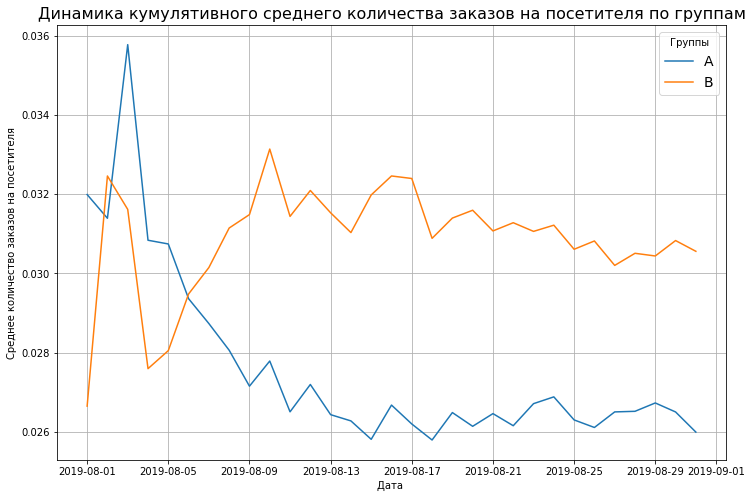

In [35]:
plt.figure(figsize=(12, 8))
# Строим график количества заказов группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['orders']/cumulativeRevenueA['visitors'], label='A')

# Строим график количества заказов группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['orders']/cumulativeRevenueB['visitors'], label='B')

plt.legend(title= 'Группы', title_fontsize = 10,  prop = {'size' : 14}) 
plt.ylabel('Среднее количество заказов на посетителя')
plt.xlabel('Дата ')
plt.title('Динамика кумулятивного среднего количества заказов на посетителя по группам', fontsize=16)
plt.grid(linewidth=0.8)

В начале теста количество заказов в группе А было выше, чем в группе В, но с 6-7 августа среднее количество заказов в группе В было примерно на 15% выше до конца теста

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

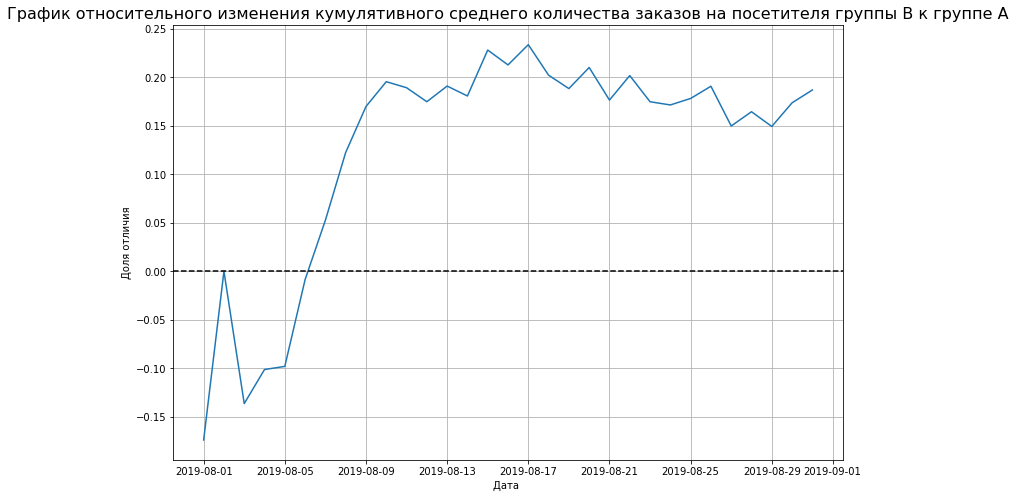

In [36]:
# собираем данные в одном датафрейме
mergedCumulativeOrders = cumulativeRevenueA.merge(
    cumulativeRevenueB, 
    left_on='date', 
    right_on='date', 
    how='left', 
    suffixes=['A', 'B']
)

# cтроим отношение средних чеков
plt.figure(figsize=(12, 8))
plt.plot(
    mergedCumulativeOrders['date'], 
    (mergedCumulativeOrders['ordersB'])/(mergedCumulativeOrders['ordersA'])-1
)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.ylabel('Доля отличия')
plt.xlabel('Дата ')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A', \
          fontsize=16)
plt.grid(linewidth=0.8)

После 5 августа произошел резкий скачок в кумулятивном среднем количестве заказов, и количество заказов посетителей группы В до конца теста отличалось от количества заказов посетителей группы А на 15-23%

### График количества заказов по пользователям

In [37]:
# создаем датафрейм с двумя столбцами 'userId' и 'orders', который хранит количество заказов каждого пользователя
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']

# вывод первых 10 строк датафрейма
display(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

,userId,orders
43,199603092,4
717,3062433592,4
886,3803269165,4
867,3717692402,4
53,237748145,4
906,3908431265,3
488,2108163459,3
57,249864742,3
924,3967698036,3
643,2742574263,3


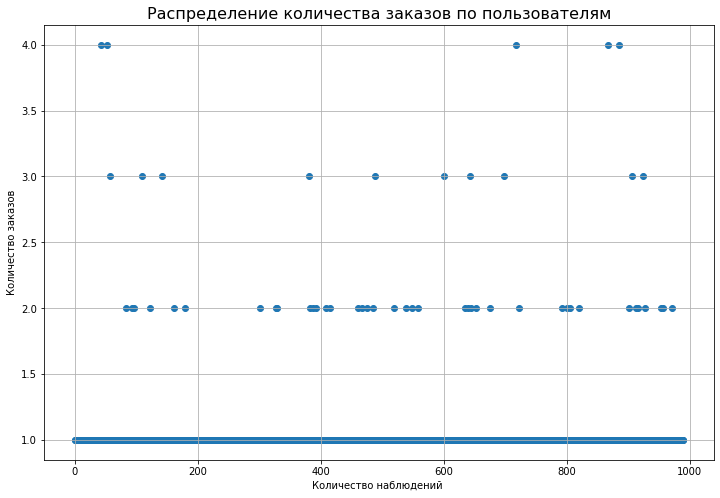

In [38]:
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))

# построение диаграммы методом scatter()
plt.figure(figsize=(12, 8))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.ylabel('Количество заказов')
plt.xlabel('Количество наблюдений ')
plt.title('Распределение количества заказов по пользователям', fontsize=16)
plt.grid(linewidth=0.8)

Пользователей, заказавших более двух раз, совсем мало. Они могут быть аномальными. Проверим, два заказа - это норма или много.

###  95-й и 99-й перцентили количества заказов на пользователя

In [39]:
# Метод np.percentile('column', [percentile1, percentile2]) находит перцентили.
print(np.percentile(ordersByUsers['orders'], [95,99]))

[2. 3.]


Не более 5% посетителей совершили два заказа. И не более 1%   больше трёх заказов.
Примем за аномальных посетителей тех, кто совершил 3 заказа и более.

###  График стоимостей заказов

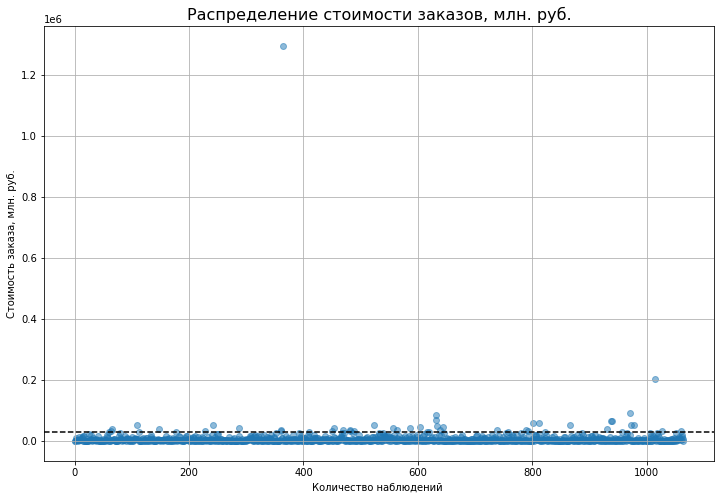

In [40]:
# серия из чисел от 0 до количества наблюдений в orders
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize=(12, 8))
plt.scatter(x_values, orders['revenue'], alpha=0.5) 
plt.ylabel('Стоимость заказа, млн. руб.')
plt.xlabel('Количество наблюдений ')
plt.title('Распределение стоимости заказов, млн. руб.', fontsize=16)
# добавим границу в 30 000 рублей
plt.axhline(y=30_000, color='black', linestyle='--')
plt.grid(linewidth=0.8)

Заказов стоимостью свыше 30 000 рублей не очень много. Есть выбросы в районе 200 000 и 1,4 млн. рублей

###  95-й и 99-й перцентили стоимости заказов

In [41]:
print(np.percentile(orders['revenue'], [95,99]))

[27308. 53904.]


Не более, чем у 5% заказов чек дороже 27 308 рублей. И не больше, чем у 1% заказов - дороже 53 904 рублей.
Примем за аномальных заказы те, у которых стоимость свыше 27308 рублей

### Расчёт статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным

In [42]:
# количество пользователей в выбранную дату в группе A
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsADaily.head()

,date,visitorsPerDateA
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


In [43]:
# кумулятивное  количество пользователей до выбранной даты включительно в группе A
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']
visitorsACummulative.head()

,date,visitorsCummulativeA
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


In [44]:
# количество пользователей в выбранную дату в группе B
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
visitorsBDaily.head()

,date,visitorsPerDateB
31,2019-08-01,713
32,2019-08-02,581
33,2019-08-03,509
34,2019-08-04,770
35,2019-08-05,707


In [45]:
# кумулятивное количество пользователей до выбранной даты включительно в группе B
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
visitorsBCummulative.head()

,date,visitorsCummulativeB
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803
34,2019-08-04,2573
35,2019-08-05,3280


In [46]:
# количество заказов в выбранную дату в группе A
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
ordersADaily.head()

,date,ordersPerDateA,revenuePerDateA
0,2019-08-01,23,142779
1,2019-08-02,19,91602
2,2019-08-03,24,112473
3,2019-08-04,13,66415
4,2019-08-05,23,100878


In [47]:
# суммарное число заказов до выбранной даты включительно в группе A
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]
ordersACummulative.head()

,date,ordersCummulativeA,revenueCummulativeA
0,2019-08-01,23,142779
1,2019-08-02,42,234381
2,2019-08-03,66,346854
3,2019-08-04,79,413269
4,2019-08-05,102,514147


In [48]:
# количество заказов в выбранную дату в группе B
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']
ordersBDaily.head()

,date,ordersPerDateB,revenuePerDateB
0,2019-08-01,19,82717
1,2019-08-02,23,162043
2,2019-08-03,15,94029
3,2019-08-04,14,96890
4,2019-08-05,21,89908


In [49]:
# суммарное число заказов до выбранной даты включительно в группе B
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]
ordersBCummulative.head()

,date,ordersCummulativeB,revenueCummulativeB
0,2019-08-01,19,82717
1,2019-08-02,42,244760
2,2019-08-03,57,338789
3,2019-08-04,71,435679
4,2019-08-05,92,525587


In [50]:
# объединение кумулятивных датафреймов с заказами и посетителями
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,19,82717,23,142779,19,82717,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,42,244760,619,581,1338,1294
2,2019-08-03,24,112473,15,94029,66,346854,57,338789,507,509,1845,1803
3,2019-08-04,13,66415,14,96890,79,413269,71,435679,717,770,2562,2573
4,2019-08-05,23,100878,21,89908,102,514147,92,525587,756,707,3318,3280


In [51]:
# Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. 
# В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

In [52]:
# Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. 
# Тем, кто ничего не заказал, будут соответствовать нули.

# в sampleA сохранили выборку, где каждый элемент — число заказов определённого пользователя, в том числе ноль
sampleA = pd.concat(
    [ordersByUsersA['orders'],
     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), 
               name='orders')],
    axis=0
)

sampleB = pd.concat(
    [ordersByUsersB['orders'],
     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), 
               name='orders')],
    axis=0
)

Перед применение теста Манна-Уитни проверим выборки на нормальность. Здесь нам поможет критерий Шапиро-Уилка:
Н0: "случайная величина распределена нормально", Н1: "случайная величина распределена ненормально"

In [53]:
#perform Shapiro-Wilk test
print(shapiro(sampleA))
print(shapiro(sampleB))

ShapiroResult(statistic=0.13114553689956665, pvalue=0.0)
ShapiroResult(statistic=0.1481528878211975, pvalue=0.0)


/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


По значениям p-value отвергается нулевая гипотеза и появляется обоснование для применения теста Манна-Уитни.
* Нулевая гипотеза: различий в среднем количестве заказов между группами нет 

* Альтернативная гипотеза: различия в среднем количестве заказов между группами есть

In [54]:
# Тест Манна-Уитни, p-value
print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative="two-sided")[1]))
# относительное различие в среднем между группами
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.00811
0.176


p-value = 0.00811 < 0.05, значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем.

Анализ "сырых данных" сообщает, что в среднем количестве заказов между группами есть статистически значимые различия. 

Относительный прирост среднего группы В к конверсии группы А равен 17.6%

### Расчёт статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

* Нулевая гипотеза: различий в среднем чеке между группами нет. 
* Альтернативная гипотеза: различия в среднем чеке между группами есть

In [55]:
# для расчета p-value, передадим критерию mannwhitneyu() данные о выручке с заказов
print('{0:.3f}'.format(
    stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                       orders[orders['group']=='B']['revenue'])[1])
     )
# найдём относительные различия в среднем чеке между группами
print('{0:.3f}'.format(
    orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)
     )

0.902
0.288


P-value 0.902 > 0.05 - причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.

Однако, средний чек группы В на 28.8% выше среднего чека группы А - сохраняется предположения об аномалиях.

### Расчёт статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Примем за аномальных посетителей тех, кто совершил от 3 заказов или совершил заказ дороже 27 308 рублей. Так мы уберем 5% посетителей с наибольшим числом заказов и от 1% до 5% посетителей с дорогими заказами.

Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 27 308 рублей — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. 

Узнаем, сколько всего аномальных пользователей атрибутом shape.

In [56]:
# срез пользователей с числом заказов >= 3
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] >= 3]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] >= 3]['userId'],
    ],
    axis=0,
)
# срез пользователей c заказами  дороже 27 308 рублей
usersWithExpensiveOrders = orders[orders['revenue'] > 27308]['visitorId']

# объединение в один датафрейм
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
# вывод 5 первых строк датафрейма
print(abnormalUsers.head(5))

print('Количество аномальных пользователей:', abnormalUsers.shape[0])

568     113298937
1099    148427295
17      199603092
928     204675465
21      237748145
dtype: int64
Количество аномальных пользователей: 68


In [57]:
# подготовим выборки количества заказов по пользователям по группам теста:

# очищенные данные группы А
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# очищенные данные группы В
sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Перед применение теста Манна-Уитни проверим выборки на нормальность. Здесь нам поможет критерий Шапиро-Уилка:
Н0: "случайная величина распределена нормально", Н1: "случайная величина распределена ненормально"

In [58]:
#perform Shapiro-Wilk test
print(shapiro(sampleAFiltered))
print(shapiro(sampleBFiltered))

ShapiroResult(statistic=0.1298506259918213, pvalue=0.0)
ShapiroResult(statistic=0.14601564407348633, pvalue=0.0)


/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


По значениям p-value отвергается нулевая гипотеза и появляется обоснование для применения теста Манна-Уитни.

* Нулевая гипотеза: различий в среднем количестве заказов между группами нет 
* Альтернативная гипотеза: различия в среднем количестве заказов между группами есть

In [59]:
# статистический критерий Манна-Уитни к полученным выборкам, p-value
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

# относительный прирост среднего очищенной группы B
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.010
0.188


P-value 0.01 < 0.05: нулевая гипотеза отвергается, статистическая значимость достигнута, различие в среднем количестве заказов между группами есть (на  "сырых" данных  - 0.008) 
Группа В значительно лучше группы А по среднему количествую заказов (18.8% на очищенных данных и 17.6% - на "сырых")

### Расчёт статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным

Нулевая гипотеза: различий в среднем чеке между группами нет
Альтернативная гипотеза: различия в среднем чеке между группами есть

In [60]:
# расчета p-value,  критерий mannwhitneyu() 
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)
#  относительные различия в среднем чеке между группами
print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.703
-0.041


P-value 0.703 > 0.05: принимаем нулевую гипотезу, причин считать, что в среднем чеке есть различия,  нет.
Но если на "сырых данных" средний чек группы В был на 28.8% выше, чем в группе А, то на очищенных данных разница между сегментами стала всего 4.1% в пользу группы А

### Решение по результатам теста



* Статистически значимое различие в среднем количестве заказов между группами есть. Группа В значительно лучше группы А (18.8% на очищенных данных и 17.6% - на "сырых")
* Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий (после фильтрации различия составили 4.1% в пользу группы А)
* График различия среднего количества заказов между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения
* График различия среднего чека колеблется: он-то и позволил найти аномалии. Сделать из этого графика определённые выводы нельзя

<b>Исходя из фактов выше следует остановить тест, зафиксировать победу группы В</b>

## Выводы
В первой части работы была проведена приоритизация гипотез. Самыми перспективными признаны гипотезы:
*	№7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
*	№2 "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"
*	№0 "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"
*	№6 "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию"
*	№8 "Запустить акцию, дающую скидку на товар в день рождения"

Во второй части работы был проведен А/В тест по кумулятивным выручке и среднему чеку для двух групп на «сырых» и «очищенных» данных, построены графики, рассчитаны 95-й и 99-й перцентили стоимости заказов и количества заказов, рассчитана статистическая значимость различий по критерию Манна-Уитни. 

По результатам теста был сделан вывод об остановке теста и фиксации победы группы В (различий по среднему чеку между группа не обнаружено (отличие 4.1% в пользу группы А), в группе В  количество заказов имеет тенденцию к росту или зафиксировалось около среднего значения и на 17.6% больше, чем в группе А)
